## **Proyek Analisis Data: [Input Nama Dataset]**
- **Nama:** Royhan Nurisalam
- **Email:** royhan211208@gmail.com
- **ID Dicoding:** rhansalam

## **Menentukan Pertanyaan Bisnis**

1. Bagaimana performa penyewaan sepeda berdasarkan musim?
2. Bagaimana pengaruh hari libur dan hari kerja terhadap performa penyewaan sepeda?

## **Import Semua Packages/Library yang Digunakan**

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

## **Data Wrangling**

### Gathering Data

**Membaca data "day.csv" melalui variabel day**

In [288]:
day_df = pd.read_csv("https://raw.githubusercontent.com/rhansalam/Proyek-Analisis-Data/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Membaca data "hour.csv" melalui variabel hour**

In [289]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/rhansalam/Proyek-Analisis-Data/main/hour.csv")
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Check data type dan data columns pada data day**

In [290]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada missing value pada data day. Namun, terdapat tipe data yang kurang tepat:
*   dteday seharusnya bertipe data datetime, bukan object
*   season seharusnya bertipe data category, bukan int
*   yr seharusnya bertipe data category, bukan int
*   mnth seharusnya bertipe data category, bukan int
*   holiday seharusnya bertipe data category, bukan int
*   weekday seharusnya bertipe data category, bukan int
*   weathersit seharusnya bertipe data category, bukan int
*   workingday seharusnya bertipe data category, bukan int

In [291]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada anomali pada data day

**Check data type dan data columns pada data hour**

In [292]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB




Tidak ada missing value pada data day. Namun, terdapat tipe data yang kurang tepat:

*   dteday seharusnya bertipe data datetime, bukan object
*   season seharusnya bertipe data category, bukan int
*   yr seharusnya bertipe data category, bukan int
*   mnth seharusnya bertipe data category, bukan int
*   holiday seharusnya bertipe data category, bukan int
*   weekday seharusnya bertipe data category, bukan int
*   weathersit seharusnya bertipe data category, bukan int
*   workingday seharusnya bertipe data category, bukan int

In [293]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak ada anomali pada data hour

### Cleaning Data

**Mengubah tipe data pada "data day" dan "data hour"**

In [294]:
kolom_datetime = ['dteday']
kolom_category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit','workingday']

for kolom in kolom_datetime:
  day_df[kolom] = pd.to_datetime(day_df[kolom])

for kolom in kolom_category:
  day_df[kolom] = day_df[kolom].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [295]:
kolom_datetime = ['dteday']
kolom_category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit','workingday']

for kolom in kolom_datetime:
  hour_df[kolom] = pd.to_datetime(hour_df[kolom])

for kolom in kolom_category:
  hour_df[kolom] = hour_df[kolom].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Perbaikan penamaan kolom**

In [296]:
day_df.rename(columns={'dteday': 'rental_date', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   rental_date  731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: categ

**Export Data Day**

In [297]:
day_df.to_csv("day_clean.csv", index=False)

**Penambahan kolom (Time_Category) pada data hour**


1.  Morning = 5 to 12
2.  Afternoon = 12 to 17
3.  Evening = 17 to 21
4.  Night = 21 to 5




In [298]:
def categorize_time(hr):
    if 5 <= hr < 12:
        return 'Morning'
    elif 12 <= hr < 17:
        return 'Afternoon'
    elif 17 <= hr < 21:
        return 'Evening'
    elif 21 <= hr or hr < 5:
        return 'Night'
    else :
      return '-'

hour_df['time_category'] = hour_df['hr'].apply(categorize_time)

print(hour_df[['hr','time_category']].head(5))
print("time kategori = ", hour_df['time_category'].unique())

   hr time_category
0   0         Night
1   1         Night
2   2         Night
3   3         Night
4   4         Night
time kategori =  ['Night' 'Morning' 'Afternoon' 'Evening']


In [299]:
hour_df['time_category'] = hour_df['time_category'].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season         17379 non-null  category      
 3   yr             17379 non-null  category      
 4   mnth           17379 non-null  category      
 5   hr             17379 non-null  int64         
 6   holiday        17379 non-null  category      
 7   weekday        17379 non-null  category      
 8   workingday     17379 non-null  category      
 9   weathersit     17379 non-null  category      
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

**Export Data Hour**

In [300]:
hour_df.to_csv("hour_clean.csv", index=False)

**Check data duplikat dan data null**

In [301]:
day_df.duplicated().sum()

0

In [302]:
hour_df.duplicated().sum()

0

In [303]:
day_df.isna().sum()

instant        0
rental_date    0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [304]:
hour_df.isna().sum()

instant          0
dteday           0
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
windspeed        0
casual           0
registered       0
cnt              0
time_category    0
dtype: int64

Tidak ada data null dan tidak ada duplikat pada "data day" dan "data hour"

**Menghapus kolom yang tidak penting**

In [305]:
kolom_drop = ['season', 'yr', 'mnth']
hour_df = hour_df.drop(columns=kolom_drop)

**Eksport Data Hour**

In [306]:
hour_df.to_csv("hour_clean.csv", index=False)

## **Exploratory Data Analysis (EDA)**

### Explore Data Day

In [307]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   rental_date  731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: categ

**Hubungan season dengan jumlah penyewaan sepeda**

In [308]:
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                         
         max   min         mean      sum          std
season                                               
1       7836   431  2604.132597   471348  1399.942119
2       8362   795  4992.331522   918589  1695.977235
3       8714  1115  5644.303191  1061129  1459.800381
4       8555    22  4728.162921   841613  1699.615261

keterangan :


1.   Spring (Musim Semi)
2.   Summer (Musim Panas)
3.   Fall (Musim Gugur)
4.   Winter (Musim Salju)



Berdasarkan pivot table di atas, dapat diketahui bahwa rental ramai pada musim gugur/fall

**Hubungan hari libur dengan jumlah penyewaan sepeda**

In [309]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                         
          max   min         mean      sum          std
holiday                                               
0        8714    22  4527.104225  3214244  1929.013947
1        7403  1000  3735.000000    78435  2103.350660

Hari libur tidak membuat rental menjadi lebih ramai, justru rental lebih ramai saat hari tidak libur

**Hubungan hari kerja dengan jumlah penyewaan sepeda**

In [310]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
             max  min         mean      sum          std
workingday                                              
0           8714  605  4330.168831  1000269  2052.141245
1           8362   22  4584.820000  2292410  1878.415583

Hari kerja membuat rental menjadi lebih ramai. Hal ini bisa terjadi karena dipakai untuk sekolah atau bekerja

**Hubungan bulan dengan jumlah penyewaan sepeda**

In [311]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum', 'std']
})

count                                        
        max   min         mean     sum          std
month                                              
1      4521   431  2176.338710  134933  1161.674370
2      5062  1005  2655.298246  151352  1145.313307
3      8362   605  3692.258065  228920  1899.301812
4      7460   795  4484.900000  269094  1776.160778
5      8294  2633  5349.774194  331686  1298.711561
6      8120  3767  5772.366667  346342  1240.400031
7      8173  3285  5563.677419  344948  1273.751871
8      7865  1115  5664.419355  351194  1494.516146
9      8714  1842  5766.516667  345991  1810.130649
10     8156    22  5199.225806  322352  1988.392517
11     6852  1495  4247.183333  254831  1285.712709
12     6606   441  3403.806452  211036  1549.639353

Jumlah rental meningkat mulai bulan Mei sampai September, dan mulai menurun saat bulan Oktober sampai Januari

**Mencari hubungan antara musim dengan bulan**

In [312]:
for x in range (5,10):
  print('bulan ke -', x)
  print(day_df.loc[day_df['month'] == x, 'season'].values.astype(int).mean())

bulan ke - 5
2.0
bulan ke - 6
2.3333333333333335
bulan ke - 7
3.0
bulan ke - 8
3.0
bulan ke - 9
3.2666666666666666


In [313]:
day_df.groupby('month')['season'].apply(lambda x: x.mode()[0])

month
1     1
2     1
3     1
4     2
5     2
6     2
7     3
8     3
9     3
10    4
11    4
12    4
Name: season, dtype: int64

Dapat dilihat bahwa bulan Mei sampai September adalah menuju dan sampai musim gugur (fall) selesai

### Analisis RFM, mencari pola user casual dan register

**Hubungan jenis user (casual dan registered) dengan jumlah penyewaan sepeda**

In [314]:
day_df[['casual','registered']].sum()

casual         620017
registered    2672662
dtype: int64

User registered 4 kali lebih banyak dari user casual

**Mencari kemungkinan apakah ada kondisi user casual mengungguli user registered**

In [315]:
day_df[['workingday','casual','registered']].groupby('workingday').sum()

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


In [316]:
day_df[['holiday','casual','registered']].groupby('holiday').sum()

,casual,registered
holiday,,
0,597658,2616586
1,22359,56076


In [317]:
day_df[['season','casual','registered']].groupby('season').sum()

,casual,registered
season,,
1,60622,410726
2,203522,715067
3,226091,835038
4,129782,711831


In [318]:
day_df[['weathersit','casual','registered']].groupby('weathersit').sum()

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


Berdasarkan 4 kondisi di atas, ternyata tidak ada kondisi yang memungkinkan user casual mengungguli user registered (user registered selalu unggul dari 4 kondisi tersebut)

### Explore Data Hour

Pada data ini memiliki hal yang sama dengan tabel "Data Day". Namun, terdapat perbedaan 1 kolom yaitu "hour", hal ini masih bisa dianalisis berdasarkan jam yang menghasilkan jumlah penyewaan sepeda terbanyak berdasarkan jam

In [319]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   hr             17379 non-null  int64         
 3   holiday        17379 non-null  category      
 4   weekday        17379 non-null  category      
 5   workingday     17379 non-null  category      
 6   weathersit     17379 non-null  category      
 7   temp           17379 non-null  float64       
 8   atemp          17379 non-null  float64       
 9   hum            17379 non-null  float64       
 10  windspeed      17379 non-null  float64       
 11  casual         17379 non-null  int64         
 12  registered     17379 non-null  int64         
 13  cnt            17379 non-null  int64         
 14  time_category  17379 non-null  category      
dtypes: category(5), dat

**Hubungan waktu (jam) dengan count**

In [320]:
hour_df[['hr','cnt']].groupby(by='hr').sum().sort_values(by='cnt',ascending=False).head(5)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789


In [321]:
hour_df[['time_category','cnt']].groupby(by='time_category').sum().sort_values(by='cnt',ascending=False)

,cnt
time_category,
Evening,1037971
Afternoon,955882
Morning,921580
Night,377246


Dari kedua output diatas (hour dan time category), rental paling ramai yaitu saat time category "Evening" yaitu dengan rentang jam 17 sampai 21


**Hubungan waktu dan working day dengan count**

In [322]:
hour_df[['time_category','cnt','workingday']].groupby(['workingday','time_category']).sum()

cnt
workingday time_category        
0          Afternoon      419306
           Evening        232858
           Morning        212252
           Night          135853
1          Afternoon      536576
           Evening        805113
           Morning        709328
           Night          241393



Dari tabel diatas terlihat bahwa saat workingday rental lebih ramai pada pagi dan sore hari. Sedangkan saat weekend/holiday lebih ramai ketika siang hari.

hal ini bisa disebabkan karena pada workingday mungkin orang menggunakannya untuk berangkat(pagi) dan pulang kerja(sore)


## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Bagaimana performa penyewaan sepeda berdasarkan musim?

In [323]:
season_rental = day_df[['count','season']].groupby(by='season').sum().reset_index()
season_map = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Salju'}
season_rental['season'] = season_rental['season'].map(season_map)
season_rental.sort_values(by='count', ascending=False,inplace=True)
season_rental = season_rental.reset_index()
season_rental

,index,season,count
0,2,Musim Gugur,1061129
1,1,Musim Panas,918589
2,3,Musim Salju,841613
3,0,Musim Semi,471348


In [324]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

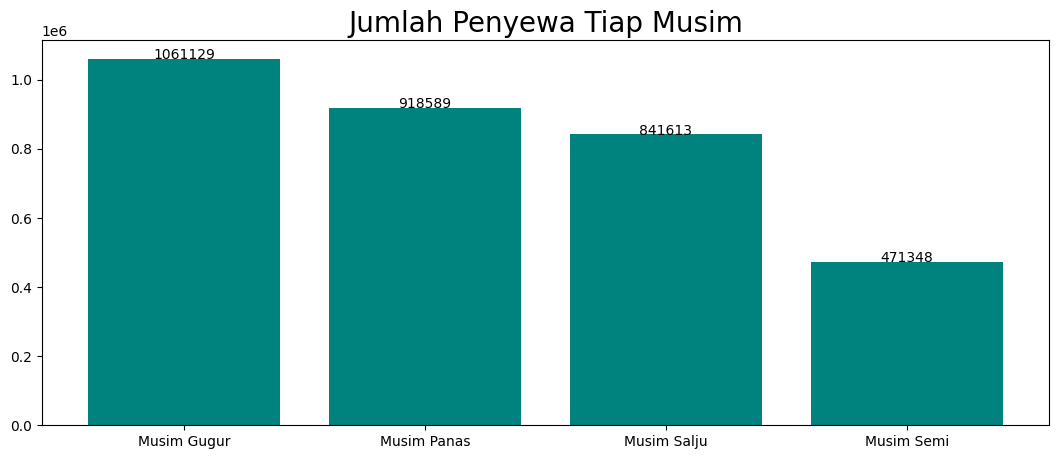

In [325]:
plt.figure(figsize=(13, 5))
plt.bar(x=season_rental['season'], height=season_rental['count'],color='#00827F')
plt.title("Jumlah Penyewa Tiap Musim", loc="center", fontsize=20)
addlabels(season_rental['season'],season_rental['count'])
plt.show()

Dapat diketahui bahwa rental ramai ketika musim gugur/fall. Dengan udara sejuk dan segar serta dedaunan yang berubah warna menjadi merah kekuningan, musim gugur adalah waktu yang tepat untuk bersepeda!

### Pertanyaan 2: Bagaimana pengaruh hari libur dan hari kerja terhadap performa penyewaan sepeda?

In [326]:
day_df[['workingday','casual','registered','count']].groupby(by='workingday').sum().reset_index()

,workingday,casual,registered,count
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


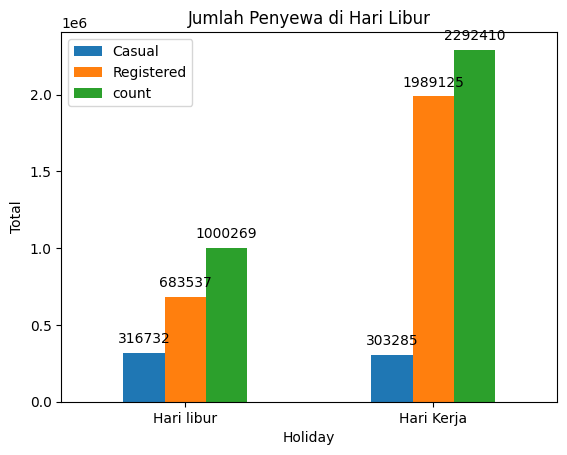

In [327]:
workingday_rental = day_df[['workingday','casual','registered','count']].groupby(by='workingday').sum().reset_index()

ax = workingday_rental.plot(kind='bar', x='workingday', y=['casual', 'registered', 'count'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Holiday')
plt.ylabel('Total')
plt.title('Jumlah Penyewa di Hari Libur')
plt.xticks([1, 0], ['Hari Kerja', 'Hari libur'], rotation=0)
plt.legend(['Casual', 'Registered', 'count'])
plt.show()

In [328]:
day_df[['holiday','casual','registered','count']].groupby(by='holiday').sum().reset_index()

,holiday,casual,registered,count
0,0,597658,2616586,3214244
1,1,22359,56076,78435


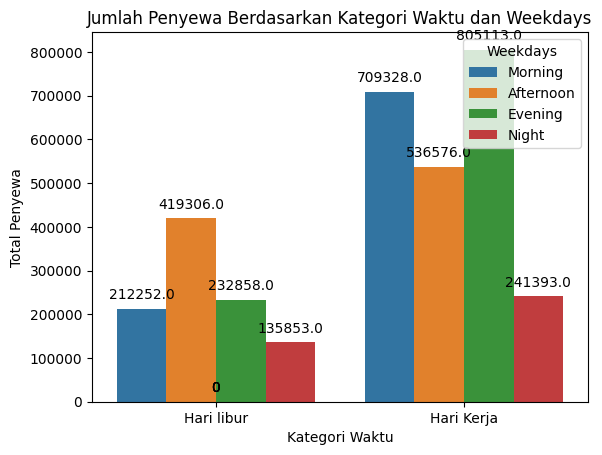

In [329]:
time_rental = hour_df[['time_category','cnt','workingday']].groupby(['workingday','time_category']).sum().reset_index()

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_rental['time_category'] = pd.Categorical(time_rental['time_category'], categories=time_order, ordered=True)

ax = sns.barplot(x='workingday', y='cnt', hue='time_category', data=time_rental, )
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Kategori Waktu')
plt.ylabel('Total Penyewa')
plt.xticks([1, 0], ['Hari Kerja', 'Hari libur'], rotation=0)
plt.title('Jumlah Penyewa Berdasarkan Kategori Waktu dan Weekdays')
plt.legend(title='Weekdays', loc='upper right')
plt.show()

Berdasarkan grafik di atas terlihat bahwa saat hari kerja, rental ramai di waktu pagi dan sore hari. Hal ini bisa terjadi karena sepeda digunakan untuk berangkat dan pulang kerja

## **Conclusion**

- Conclution pertanyaan 1

>> Performa penyewaan sepeda pada setiap musim terlihat baik dan tidak ada anjlokan yang terlalu jauh. Musim gugur menjadi musim paling ramai untuk menyewa sepeda karena musim gugur adalah musim terbaik untuk bersepeda.

- Conclution pertanyaan 2


>> Jumlah rental pada hari kerja lebih banyak lebih dari 2 kali lipat dari hari libur. Hal ini bisa terjadi karena sepeda digunakan untuk bekerja atau sekolah.


